# Introduction

In this notebook, a barebones example is given on how to create a piping fragility curve using an Excel file as input for the [ProbPipingFixedWaterlevel](/probabilistic_piping/reference/ProbPipingFixedWaterlevel.html) class.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from probabilistic_piping import ProbInput, ProbPipingFixedWaterlevel

## Creating input data

Probabilistic calculations expect an instance of [ProbInput](/probabilistic_piping/reference/ProbInput.html). A practical way of making this [ProbInput](/probabilistic_piping/reference/ProbInput.html) instance is from a specially crafted Excel sheet.

In [2]:
data_path = Path("../../../test/data/full_test.xlsx")
df_input = pd.read_excel(data_path, sheet_name="input", index_col=0, header=0)
df_input.head(3)

,Beschrijving,Waarde,Kansverdeling,Verschuiving,Mean,Spreiding,Spreidingstype,Afknot_links,Afknot_rechts,Min,Step,Max,StDev
Naam,,,,,,,,,,,,,
D,D -- Dikte pipinggevoelige zandlaag (aquifer) [m],4.44234,Lognormaal,0.0,9.000000,0.50,Standaardafwijking,NaN,NaN,NaN,NaN,NaN,0.500000
D_cover,D_cover -- Dikte (cohesieve) deklaag in [m],3.12096,Lognormaal,0.0,4.000000,0.50,Standaardafwijking,NaN,NaN,NaN,NaN,NaN,0.500000
d_70,d_70 -- 70% kwantiel korrelgrootte van pipingg...,0.0,Lognormaal,0.0,0.000161,0.12,Variatiecoëfficiënt,NaN,NaN,NaN,NaN,NaN,0.000019


The Excel data is converted to a [ProbInput](/probabilistic_piping/reference/ProbInput.html) instance using the classmethod `from_dataframe()`. The [ProbInput](/probabilistic_piping/reference/ProbInput.html) class has a number of attributes: `params`, `stochasts`, `charvals`, `calc_options` and `hlist`.

Depending on the type of calculation, not all options need to be set.

In [3]:
inp_data = ProbInput.from_dataframe(df_input)

`params` are deterministic (fixed) variables

In [4]:
inp_data.params

{'d_70m': 0.000208,
 'g': 9.81,
 'gamma_water': 10,
 'r_c': 0.3,
 'v': 1.33e-06,
 'gamma_sp': 16.19,
 't_norm': 300}

`stochasts` are stochastic variables

In [5]:
inp_data.stochasts

{'D': class=LogNormal name=LogNormal dimension=1 muLog=2.19568 sigmaLog=0.0555128 gamma=0,
 'D_cover': class=LogNormal name=LogNormal dimension=1 muLog=1.37854 sigmaLog=0.124516 gamma=0,
 'd_70': class=LogNormal name=LogNormal dimension=1 muLog=-8.74125 sigmaLog=0.119571 gamma=0,
 'eta': class=LogNormal name=LogNormal dimension=1 muLog=-1.30934 sigmaLog=0.00370369 gamma=0,
 'gamma_sat': class=LogNormal name=LogNormal dimension=1 muLog=1.93859 sigmaLog=0.120984 gamma=10,
 'h_exit': class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[-1.5] sigma=class=Point name=Unnamed dimension=1 values=[0.1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1],
 'i_ch': class=LogNormal name=LogNormal dimension=1 muLog=-0.712758 sigmaLog=0.198042 gamma=0,
 'k': class=LogNormal name=LogNormal dimension=1 muLog=-9.05833 sigmaLog=0.246221 gamma=0,
 'L': class=LogNormal name=LogNormal dime

`charvals` are characteristic values of the stochastic variables

In [6]:
inp_data.charvals

{'D': 4.44234,
 'D_cover': 3.12096,
 'd_70': 1.88016e-07,
 'eta': 0.282277,
 'gamma_sat': 13.4991,
 'h_exit': 0.0996889,
 'i_ch': 0.22333,
 'k': 4.75458e-09,
 'L': 88.0597,
 'm_p': 0.996009,
 'm_u': 0.994455,
 'r_exit': 0.793916,
 'theta': 42.8826,
 'h': 5.0}

`calc_options` are options to be used in specific probabilistic methods

In [7]:
inp_data.calc_options

{'Rekentechniek': 'FORM AbdoRackwitz',
 'FORM start': 'mean',
 'MaximumAbsoluteError': 0.01,
 'MaximumRelativeError': 0.01,
 'MaximumResidualError': 1e-05,
 'MaximumConstraintError': 0.01,
 'MaximumIterationNumber': 100,
 'MaximumEvaluationNumber': 1000000000,
 'MaximumCoefficientOfVariation': 0.1,
 'BlockSize': 1000,
 'MaximumOuterSampling': 1000}

 `hlist` is a range of water levels

In [8]:
np.array(inp_data.hlist)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

## Running a fragility curve calculation

From this input data, we can now create a probabilistic piping calculation for a fixed water level. Fragility curves can be created for the submechanisms of `heave`, `uplift`, `sellmeijer` or the combination of the former as the mechanism `combi`. 

In this example, a fragility curve is calculated for the combined mechanism. Furthermore, all stochasts are assumed to be independent (`copula=None`).

In [9]:
prob = ProbPipingFixedWaterlevel(progress=False)
_, pc = prob.fixed_waterlevel_fragilitycurve(inp_data, z_type="combi", copula=None)

The results variable contains a list of [ProbResult](/probabilistic_piping/reference/ProbResult.html) instances. A [ProbResult](/probabilistic_piping/reference/ProbResult.html) is created for each water level, as each water level is a separate probabilistic calculation. A [ProbResult](/probabilistic_piping/reference/ProbResult.html) instance contains detailed information of such probabilistic calculation.

In [10]:
pc.results[-1]

ProbResult(h=20.0, prob_cond=1.0, converged=True, z_val=-0.008833492203210946, physical_design={'D': 8.986143178848712, 'D_cover': 6.58284495390116, 'd_70': 0.00015985317099639446, 'eta': 0.2699981481671999, 'gamma_sat': 16.948956640465564, 'h_exit': -1.484810143498369, 'i_ch': 1.8689020277881134, 'k': 0.00011641710001743983, 'L': 115.7358486166931, 'm_p': 1.0, 'm_u': 1.0, 'r_exit': 0.5753293471050961, 'theta': 36.99999864864872}, standard_design={'D': 0.0, 'D_cover': 4.063136676773775, 'd_70': 0.0, 'eta': 0.0, 'gamma_sat': 0.0, 'h_exit': 0.15189856501631158, 'i_ch': 6.756684392040727, 'k': 0.0, 'L': 0.0, 'm_p': 0.0, 'm_u': 0.0, 'r_exit': -3.255032876550169, 'theta': 0.0}, importancefactors={'D': -0.0, 'D_cover': -0.4762718148038311, 'd_70': -0.0, 'eta': -0.0, 'gamma_sat': -0.0, 'h_exit': -0.017805210846084572, 'i_ch': -0.7920034676286446, 'k': -0.0, 'L': -0.0, 'm_p': -0.0, 'm_u': -0.0, 'r_exit': 0.3815476905373615, 'theta': -0.0}, functionevals=45, mechanism='combi')

## Visualizing the calculated fragility curve

Using the result object, the fragility curve can be visualized using the water levels and the conditional probabilities.

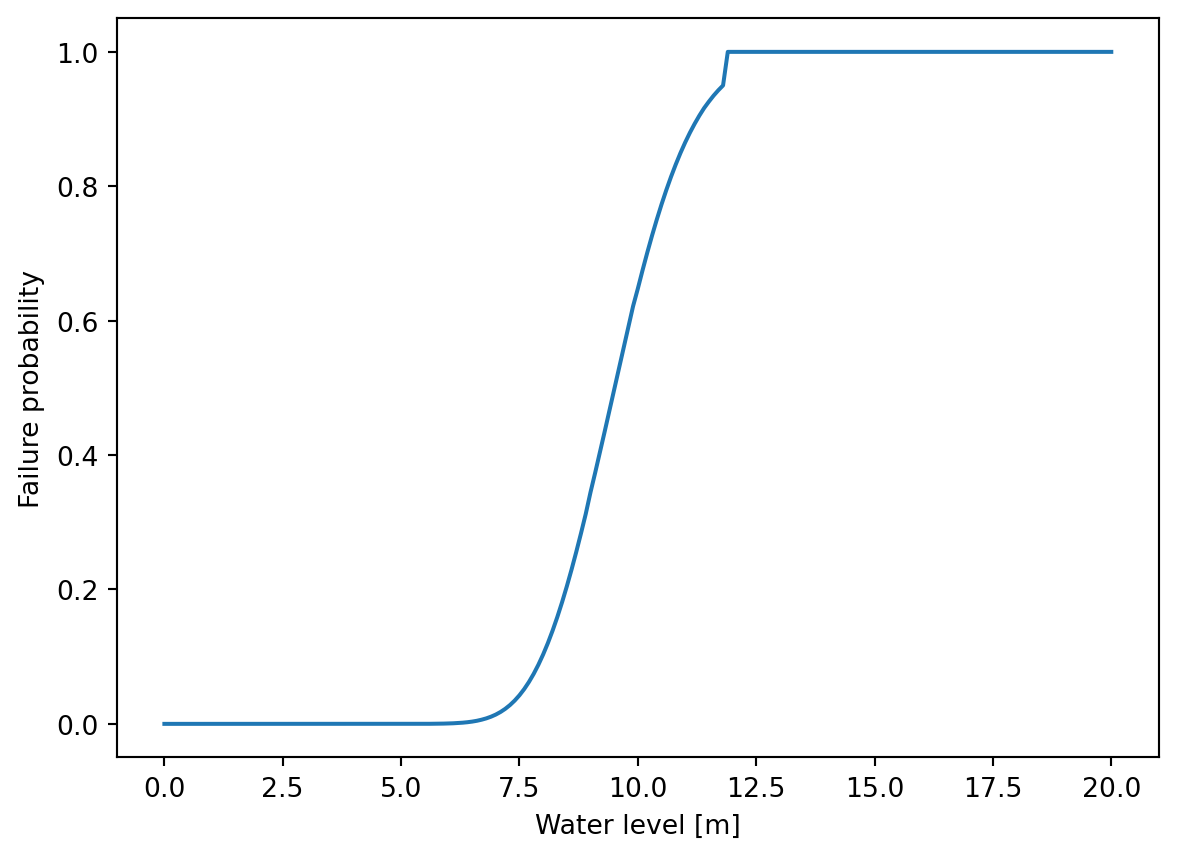

In [11]:
fig, ax = plt.subplots()
ax.plot([r.h for r in pc.results], [r.prob_cond for r in pc.results])
ax.set_xlabel("Water level [m]")
ax.set_ylabel("Failure probability");